# Tarea 3 Algoritmos de Aprendizaje Supervisado

# Dataset Regresión Logística – Heart Disease Cleveland UCI

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [3]:

#librerias

import pandas as pd # manejo y analisis de estructuras de datos
import numpy as np # Calculo numerico y el analisis de datos
import seaborn as sns # Creacion de graficos estadisticos
import matplotlib.pyplot as plt # Creacion de graficos en dos dimensiones

#librerias para implemetar modelos de ciencia de datos / modelos de machir

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [5]:
# Lectura de datos en python y lo cargamos en la variable datos
# variable datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [7]:
# Realizamos lectura de los datos para el analisis exploratorio

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
# Descripcion de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de Datos Faltantes Y Atípicos CP (dolor en el pecho)')

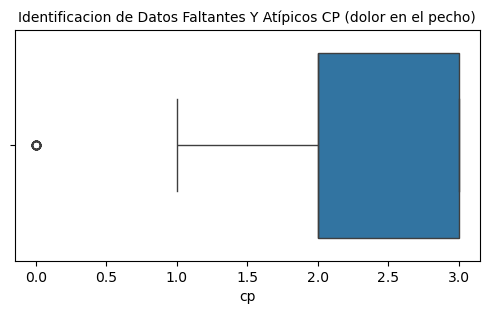

In [11]:
# Identificacion de datos faltantes y atípicos

# Grafica de caja

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificacion de Datos Faltantes Y Atípicos CP (dolor en el pecho)', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes Y Atípicos trestbps')

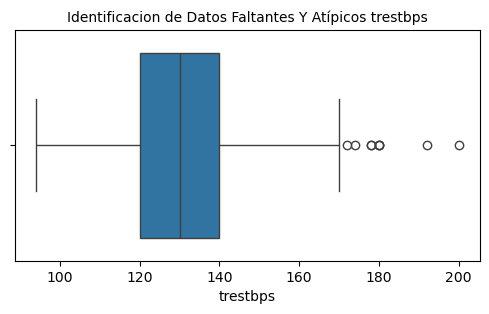

In [13]:
# Identificacion de datos faltantes y atípicos

# Grafica de caja

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificacion de Datos Faltantes Y Atípicos trestbps', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [15]:
# Revisión de datos faltantes

print("Cantidad de Registroos con cero en Sexo: ", Datos['sex'].isin([0]).sum())
print("Cantidad de Registroos con cero en Tipo de dolor torácico: ", Datos['cp'].isin([0]).sum())
print("Cantidad de Registroos con cero en Azucar en la Sangre: ", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registroos con cero en Resultados electrocardiográficos en reposo: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registroos con cero en Angina inducida por el ejercicio: ", Datos['exang'].isin([0]).sum())
print("Cantidad de Registroos con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registroos con cero en La pendiente del segmento ST de ejercicio pico: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registroos con cero en Numero de vasos principales : ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registroos con cero en Condicion: ", Datos['condition'].isin([0]).sum())

Cantidad de Registroos con cero en Sexo:  96
Cantidad de Registroos con cero en Tipo de dolor torácico:  23
Cantidad de Registroos con cero en Azucar en la Sangre:  254
Cantidad de Registroos con cero en Resultados electrocardiográficos en reposo:  147
Cantidad de Registroos con cero en Angina inducida por el ejercicio:  200
Cantidad de Registroos con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo:  96
Cantidad de Registroos con cero en La pendiente del segmento ST de ejercicio pico:  139
Cantidad de Registroos con cero en Numero de vasos principales :  174
Cantidad de Registroos con cero en Condicion:  160


In [17]:
# Reemplazar todos los ceros con el  valor medio (Promedio) de la columna.

Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [74]:
# Revisión de datos faltantes nuevamente

print("Cantidad de Registroos con cero en Sexo: ", Datos['sex'].isin([0]).sum())
print("Cantidad de Registroos con cero en Tipo de dolor torácico: ", Datos['cp'].isin([0]).sum())
print("Cantidad de Registroos con cero en Azucar en la Sangre: ", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registroos con cero en Resultados electrocardiográficos en reposo: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registroos con cero en Angina inducida por el ejercicio: ", Datos['exang'].isin([0]).sum())
print("Cantidad de Registroos con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registroos con cero en La pendiente del segmento ST de ejercicio pico: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registroos con cero en Numero de vasos principales : ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registroos con cero en Condicion: ", Datos['condition'].isin([0]).sum())

Cantidad de Registroos con cero en Sexo:  0
Cantidad de Registroos con cero en Tipo de dolor torácico:  23
Cantidad de Registroos con cero en Azucar en la Sangre:  254
Cantidad de Registroos con cero en Resultados electrocardiográficos en reposo:  147
Cantidad de Registroos con cero en Angina inducida por el ejercicio:  200
Cantidad de Registroos con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo:  0
Cantidad de Registroos con cero en La pendiente del segmento ST de ejercicio pico:  139
Cantidad de Registroos con cero en Numero de vasos principales :  174
Cantidad de Registroos con cero en Condicion:  160


Text(0.5, 1.0, 'Identificacion de Datos Atipicos')

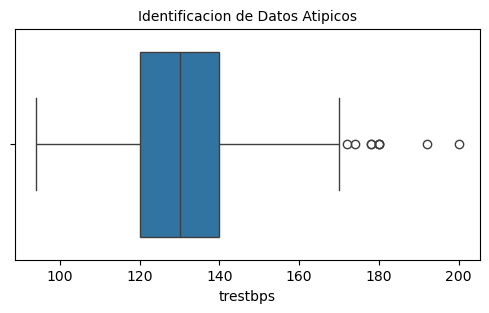

In [19]:
# Identificacion de datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificacion de Datos Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Atipicos Colesterol')

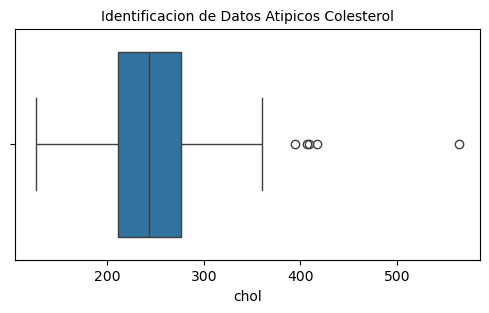

In [21]:
# Identificacion de datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificacion de Datos Atipicos Colesterol', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Atipicos Frecuencia cardiaca')

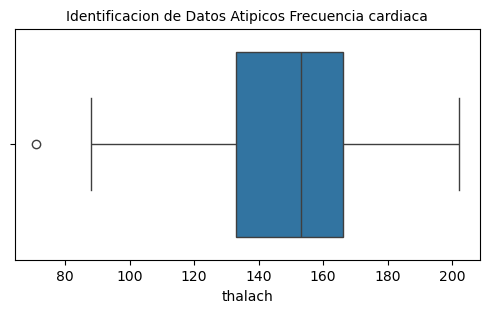

In [23]:
# Identificacion de datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificacion de Datos Atipicos Frecuencia cardiaca', fontsize=10 )

In [25]:
# Conteo de datos atipicos
nivel_minimo=200
nivel_maximo=300

Total_atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos en la frecuencia cardiaca es {} ".format(Total_atipicos))

El total de datos atipicos en la frecuencia cardiaca es 92 


In [27]:
# Filtra Datos atipicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [29]:
# Validar si se removieron los datos atipicos

Total_atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos en la frecuencia cardiaca es {} ".format(Total_atipicos))

El total de datos atipicos en la frecuencia cardiaca es 0 


In [31]:
# Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        203 non-null    int64  
 1   sex        203 non-null    float64
 2   cp         203 non-null    int64  
 3   trestbps   203 non-null    int64  
 4   chol       203 non-null    int64  
 5   fbs        203 non-null    int64  
 6   restecg    203 non-null    int64  
 7   thalach    203 non-null    int64  
 8   exang      203 non-null    int64  
 9   oldpeak    203 non-null    float64
 10  slope      203 non-null    int64  
 11  ca         203 non-null    int64  
 12  thal       203 non-null    int64  
 13  condition  203 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 23.8 KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

### Condición: 0 = sin enfermedad, 1 = enfermedad

In [38]:
# Total personas con Enfermedad cardiaca

Datos['condition'].value_counts()

condition
0    109
1     94
Name: count, dtype: int64

In [42]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [49]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la informacion del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de traincon los datos de la columna condition

# La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [52]:
print (X_train)

     age       sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
26    66  1.000000   1       160   246    0        0      120      1   
80    67  1.000000   2       152   212    0        2      150      0   
236   56  1.000000   3       125   249    1        2      144      1   
217   58  1.000000   3       146   218    0        0      105      0   
289   42  1.000000   3       140   226    0        0      178      0   
..   ...       ...  ..       ...   ...  ...      ...      ...    ...   
28    62  1.000000   1       120   281    0        2      103      0   
150   39  0.676768   2       138   220    0        0      152      0   
270   47  1.000000   3       110   275    0        2      118      1   
168   66  1.000000   3       112   212    0        2      132      1   
18    45  1.000000   0       110   264    0        0      132      0   

      oldpeak  slope  ca  thal  
26   1.055556      1   3     1  
80   0.800000      1   0     2  
236  1.200000      1   1     0  
217

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [55]:
# Construir el modelo de regresion logistica

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crear el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La funcion predict predice los valores a partir del conjunto de datos de validacion



In [57]:
print (Y_test)

275    0
3      1
215    0
170    1
220    1
130    0
154    0
115    0
23     0
276    0
90     0
185    1
16     0
66     0
187    1
169    0
136    1
262    1
148    0
181    1
64     0
96     1
49     0
199    1
139    0
197    1
285    0
216    1
10     1
89     0
125    0
98     1
266    0
103    1
261    0
71     0
11     1
82     0
212    0
243    1
256    0
141    0
132    0
248    1
33     1
52     1
192    1
41     0
214    1
229    1
225    1
Name: condition, dtype: int64


In [61]:
print (Prediccion)

[0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [64]:
# Desempeño del modelo de regresión

print (classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.82      0.75      0.78        24

    accuracy                           0.80        51
   macro avg       0.81      0.80      0.80        51
weighted avg       0.80      0.80      0.80        51



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

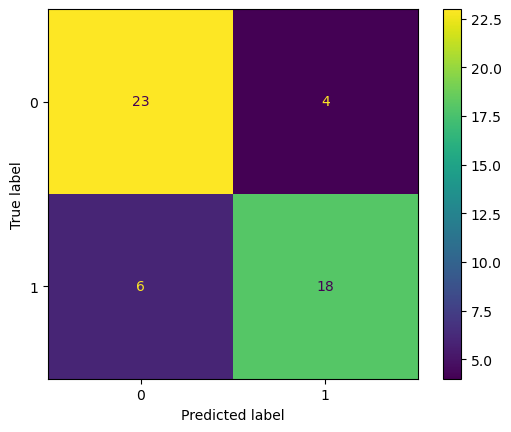

In [69]:
# Matrix de confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


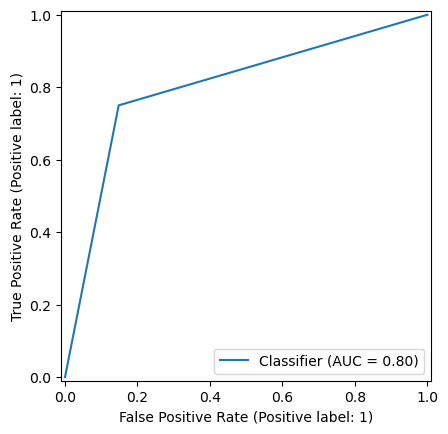

In [71]:
# Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()